# Module 10

In [360]:
# Required imports

import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings


## Importing the Data

In [361]:
# Loading the data

df_market_data = pd.read_csv(
    Path("Resources/crypto_market_data.csv").absolute(),
    index_col="coin_id")

# Displaying sample data

df_market_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [362]:
# Generate summary statistics

df_market_data.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [363]:
# Plotting the data for a QUICK REVIEW

df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)


:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

## Preparing the Data

In [364]:
# Using the `StandardScaler()` module to normalize the data

scaled_data = StandardScaler().fit_transform(df_market_data)

# A quick review

scaled_data


array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [365]:
# Create a DataFrame with the scaled data

df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data

df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index

df_market_data_scaled.set_index("coin_id", inplace=True)

# Display sample data

df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Finding the Best Value for k Using the Original Data

In [366]:
# Creating a list with the number of k-values to try
# Using a range from 1 to 11

k = list(range(1, 11))


In [367]:
# Creating an empy list to store the inertia values

inertia = []


In [368]:
# Ignoring warnings

warnings.simplefilter("ignore")


In [369]:
# Creating a `for` loop to compute the inertia with each possible value of k

for x in k:
    # Creating a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=x, random_state=1)

    # Fitting the model to the data using `df_market_data_scaled`
    model.fit(df_market_data_scaled)
    
    # Appending the model.inertia_ to the inertia list
    inertia.append(model.inertia_)


In [370]:
# Creating a dictionary with the data to plot the Elbow curve

elbow_curve = {"k": k, "inertia": inertia}

# Creating a DataFrame with the data to plot the Elbow curve

elbow_curve_df = pd.DataFrame(elbow_curve)


In [371]:
# Plotting a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_curve_kmeans_plot = elbow_curve_df.hvplot.line(
    x="k", 
    y="inertia",
    xlabel = "K",
    ylabel = "Inertia",
    title="Elbow Curve Using KMeans", 
    xticks=k
)

elbow_curve_kmeans_plot


:Curve   [k]   (inertia)

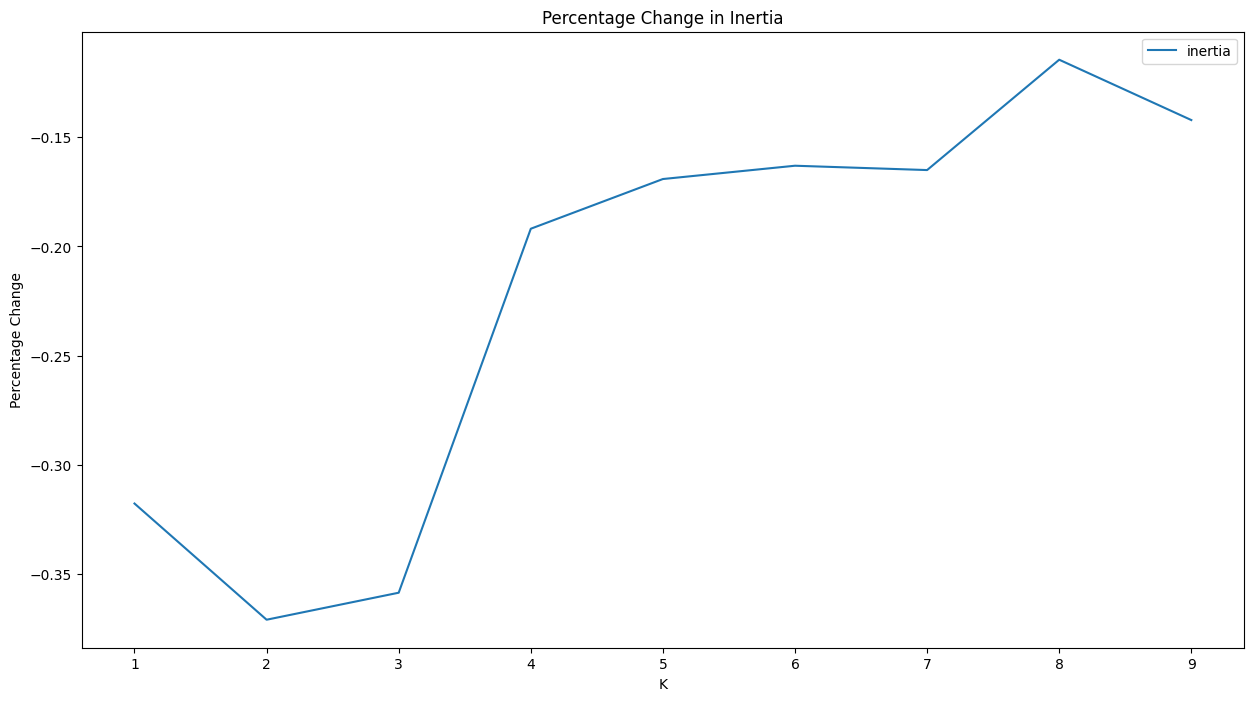

In [372]:
# Quick Percentage Change Check

import matplotlib.pyplot as plt
%matplotlib inline
elbow_curve_df.drop(columns="k").pct_change().plot(figsize=(15, 8), xlabel="K", ylabel="Percentage Change", 
    title= "Percentage Change in Inertia")
plt.show()


#### Answer the following question :
#### **Question:** What is the best value for `k`?

**Answer:** As per the `visualization` the best value should be `4`.

---

### Clustering Cryptocurrencies with K-means Using the Original Data

In [373]:
# Initializing the K-Means model using the best value for k
 
model = KMeans(n_clusters=4, random_state= 1)


In [374]:
# Fitting the K-Means model using the scaled data

model.fit(df_market_data_scaled)


KMeans(n_clusters=4, random_state=1)

In [375]:
# Predicting the clusters to group the cryptocurrencies using the scaled data

kmeans_4 = model.predict(df_market_data_scaled)

# Viewing the resulting array of cluster values.

kmeans_4


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [376]:
# Creating a copy of the DataFrame

df_market_data_scaled_predictions = df_market_data_scaled.copy()


In [377]:
# Adding a new column to the DataFrame with the predicted clusters

df_market_data_scaled_predictions["segment"] = kmeans_4

# Displaying sample data

df_market_data_scaled_predictions.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,segment
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [378]:
# Creating a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Coloring the graph points with the labels found using K-Means and 
# also adding the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_market_data_scaled_predictions_plot = df_market_data_scaled_predictions.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    ylabel = "Price Change Percentage in 7d",
    xlabel = "Price Change Percentage in 24h",
    by = "segment",
    hover_cols = "coin_id",
    title = "Clustering/Predicting Using Original Data"
)

display(df_market_data_scaled_predictions_plot)


:NdOverlay   [segment]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimizing Clusters with Principal Component Analysis

In [379]:
# Creating a PCA model instance and setting `n_components=3`.

pca_model = PCA(n_components=3)


In [380]:
# Using the PCA model with `fit_transform` to reduce to 
# three principal components.

market_data_scaled_pca = pca_model.fit_transform(df_market_data_scaled_predictions)

# View the first five rows of the DataFrame.
 
market_data_scaled_pca[:5]


array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [381]:
# Retrieving the explained variance to determine how much information 
# can be attributed to each principal component.

pca_model.explained_variance_ratio_


array([0.34871677, 0.31363391, 0.22627118])

#### Answer the following question : 

#### **Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components are `0.34871677`, `0.31363391`, `0.22627118`.

In [382]:
# Creating a DataFrame with the PCA data

df_market_data_scaled_pca = pd.DataFrame(market_data_scaled_pca,
    columns=["PC1", "PC2", "PC3"]
)

# Copying the crypto names from the original data

df_market_data_scaled_pca["coin_id"] = df_market_data.index

# Setting the coinid column as index

df_market_data_scaled_pca.set_index("coin_id", inplace=True)

# Display sample data

df_market_data_scaled_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321


---

### Finding the Best Value for k Using the PCA Data

In [383]:
# Creating a list with the number of k-values to try
# Using a range from 1 to 11

k = list(range(1, 11))


In [384]:
# Creating an empty list to store the inertia values

inertia = []


In [385]:
# Creating a for loop to compute the inertia with each possible value of k

for x in k:
    # Creating a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=x, random_state=1)
    
    # Fitting the model to the data using `df_market_data_pca`
    k_model.fit(df_market_data_scaled_pca)

    # Appending the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)


In [386]:
# Creating a dictionary with the data

elbow_curve = {"k": k, "inertia": inertia}

# Creating a DataFrame with the data to plot the Elbow curve

elbow_curve_pca_df = pd.DataFrame(elbow_curve)


In [387]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k

elbow_curve_pca_plot = elbow_curve_pca_df.hvplot.line(
    x = "k",
    y = "inertia",
    xlabel = "Value of K",
    ylabel = "Inertia",
    title = "Elbow Curve Using PCA"
)


#### Answer the following questions :

#### **Question:** What is the best value for `k` when using the PCA data?

**Answer:** The best value for `k` using the PCA data would be 4.


#### **Question:** Does it differ from the best k value found using the original data?

**Answer:** The best value for `k` in both cases is the same.

---

### Clustering Cryptocurrencies with K-means Using the PCA Data

In [388]:
# Initialize the K-Means model using the best value for k

kmeans_4 = KMeans(n_clusters= 4, random_state= 1)


In [389]:
# Fit the K-Means model using the PCA data

kmeans_4.fit(df_market_data_scaled_pca)


KMeans(n_clusters=4, random_state=1)

In [390]:
# Predicting the clusters to group the cryptocurrencies using the PCA data

k_model = kmeans_4.predict(df_market_data_scaled_pca)

# View the resulting array of cluster values

k_model


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [391]:
# Create a copy of the DataFrame with the PCA data

df_market_data_scaled_pca_predictions = df_market_data_scaled_pca.copy()

# Add a new column to the DataFrame with the predicted clusters

df_market_data_scaled_pca_predictions["Predictions"] = k_model

# Display sample data

df_market_data_scaled_pca_predictions.head(8)


,PC1,PC2,PC3,Predictions
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1
binancecoin,0.822871,-1.682096,-0.905203,1
chainlink,0.913868,-1.128684,-2.730038,1
cardano,0.811102,-1.113378,-1.598655,1


In [392]:
# Creating a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Coloring the graph points with the labels found using K-Means and 
# also adding the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_market_data_scaled_pca_predictions_plot = df_market_data_scaled_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by = "Predictions",
    hover_cols = "coin_id",
    title = "Clustering/Predicting Using PCA Data"
)

display(df_market_data_scaled_pca_predictions_plot)


:NdOverlay   [Predictions]
   :Scatter   [PC1]   (PC2,coin_id)

---

#### Visualizing and Comparing the Results

In [393]:
# Composite plotting to contrast the Elbow curves

elbow_curve_kmeans_plot + elbow_curve_pca_plot


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [394]:
# Composite plotting to contrast the clusters

df_market_data_scaled_predictions_plot + df_market_data_scaled_pca_predictions_plot


:Layout
   .NdOverlay.I  :NdOverlay   [segment]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Predictions]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question :

#### **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

**Answer:** After using fewer features by using K-Means clustering; the visualization is less organized in comparison to applying more features using PCA.